In [ ]:
from dotenv import load_dotenv
load_dotenv()

In [4]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver

In [5]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)
llm = ChatOpenAI(streaming=True)
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

checkpointer = MemorySaver()
graph = graph_builder.compile(checkpointer=checkpointer)

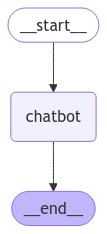

In [6]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [7]:
config = {"configurable": {"thread_id": "1"}}

user_input = "Hi there! My name is Yamoto."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Yamoto.
================================== Ai Message ==================================

Hello Yamoto! It's nice to meet you. How can I assist you today?


In [17]:
graph.get_state(config)

StateSnapshot(values={'messages': [HumanMessage(content='Hi there! My name is Yamoto.', additional_kwargs={}, response_metadata={}, id='ebec2b3e-56ca-4f55-8f4e-9f92042e0e18'), AIMessage(content="Hello Yamoto! It's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-3.5-turbo-0125'}, id='run-6166bf65-492f-4823-8085-2a99c40f3eff-0')]}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1efa1010-b250-63bd-8001-3339e7717732'}}, metadata={'source': 'loop', 'writes': {'chatbot': {'messages': [AIMessage(content="Hello Yamoto! It's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-3.5-turbo-0125'}, id='run-6166bf65-492f-4823-8085-2a99c40f3eff-0')]}}, 'thread_id': '1', 'step': 1, 'parents': {}}, created_at='2024-11-12T14:18:52.578843+00:00', parent_config={'configurable': {'thread_id': '1', 'ch

In [18]:
list(graph.get_state_history(config))

[StateSnapshot(values={'messages': [HumanMessage(content='Hi there! My name is Yamoto.', additional_kwargs={}, response_metadata={}, id='ebec2b3e-56ca-4f55-8f4e-9f92042e0e18'), AIMessage(content="Hello Yamoto! It's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-3.5-turbo-0125'}, id='run-6166bf65-492f-4823-8085-2a99c40f3eff-0')]}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1efa1010-b250-63bd-8001-3339e7717732'}}, metadata={'source': 'loop', 'writes': {'chatbot': {'messages': [AIMessage(content="Hello Yamoto! It's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-3.5-turbo-0125'}, id='run-6166bf65-492f-4823-8085-2a99c40f3eff-0')]}}, 'thread_id': '1', 'step': 1, 'parents': {}}, created_at='2024-11-12T14:18:52.578843+00:00', parent_config={'configurable': {'thread_id': '1', 'c

In [19]:
user_input = "Guess where I am from!"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Guess where I am from!
================================== Ai Message ==================================

Hmm, that's a tough one! Based on your name, I would guess that you are from Japan. Am I correct?


In [20]:
list(graph.get_state_history(config))

[StateSnapshot(values={'messages': [HumanMessage(content='Hi there! My name is Yamoto.', additional_kwargs={}, response_metadata={}, id='ebec2b3e-56ca-4f55-8f4e-9f92042e0e18'), AIMessage(content="Hello Yamoto! It's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-3.5-turbo-0125'}, id='run-6166bf65-492f-4823-8085-2a99c40f3eff-0'), HumanMessage(content='Guess where I am from!', additional_kwargs={}, response_metadata={}, id='a5624ad3-2a37-4097-96d6-27dce07021a2'), AIMessage(content="Hmm, that's a tough one! Based on your name, I would guess that you are from Japan. Am I correct?", additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-3.5-turbo-0125'}, id='run-15b08a3a-e7fd-42c4-ab47-528f92263b16-0')]}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1efa1021-44a1-6143-8004-0fb15af49463'}}, metadata={'source': 'loop', 'writes': {'cha

In [26]:
list(graph.get_state_history(config))[0].values['messages']

[HumanMessage(content='Hi there! My name is Yamoto.', additional_kwargs={}, response_metadata={}, id='ebec2b3e-56ca-4f55-8f4e-9f92042e0e18'),
 AIMessage(content="Hello Yamoto! It's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-3.5-turbo-0125'}, id='run-6166bf65-492f-4823-8085-2a99c40f3eff-0'),
 HumanMessage(content='Guess where I am from!', additional_kwargs={}, response_metadata={}, id='a5624ad3-2a37-4097-96d6-27dce07021a2'),
 AIMessage(content="Hmm, that's a tough one! Based on your name, I would guess that you are from Japan. Am I correct?", additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-3.5-turbo-0125'}, id='run-15b08a3a-e7fd-42c4-ab47-528f92263b16-0')]